In [2]:
# Base Libraries
import time
import datetime
import os
import re

# Scientific libraries
import pandas as pd
import numpy as np
from pandas.core.interchange.dataframe_protocol import DataFrame
from scipy.stats import alpha
from sklearn.decomposition import PCA

# Visual libraries
import seaborn as sns
import matplotlib.pyplot as plt
print("Set up complete")

Set up complete


In [3]:
procDataPath = "C:/Users/86139/Desktop/FishTetherExperiment/ProcessedData/processed_AllFishCombined_unfiltered.csv"

# procAnaPath = "C:/Users/86139/Desktop/FishTetherExperiment/ProcessedData/processed_AnalysisData.csv"

proc_data = pd.read_csv(procDataPath, parse_dates=True)

# proc_ana = pd.read_csv(procAnaPath, parse_dates=True)
print("Reading complete")

C:\Users\86139\AppData\Local\Temp\ipykernel_12372\4197869796.py:5: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  proc_data = pd.read_csv(procDataPath, parse_dates=True)


Reading complete


In [5]:
proc_data.shape

(67288, 483)

In [5]:
proc_ana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14575 entries, 0 to 14574
Columns: 484 entries, fishNum to F260
dtypes: float64(459), int64(13), object(12)
memory usage: 53.8+ MB


In [6]:
## Subset EDA, Training, and Validation data
burbotCount = 2
lakeTroutCount = 17
lakeWhiteFishCount = 10
smallMouthBassCount = 12

## Predixes
burbotPr = "BUR"
lakeTroutPr = "LT"
lakeWhiteFishPr = "LWF"
smallMouthBassPr = "SMB"


## Generate the fishNum
def makeFishNum(prefix, count):
    """
    Computes an array of fish numbers, in format like "LWF001", "LWF012"
    :param prefix: a string of character in length 2 or 3, all capitalized
    :param count: an integer
    :return: a list of strings that represent fish numbers, count from 001 to 00n
    """
    countSeq = list(range(count + 1))[1:]
    fishNum = [prefix + (3 - len(str(c))) * "0" + str(c) for c in countSeq]
    return fishNum


burbotNum = makeFishNum("BUR", burbotCount)
lakeTroutNum = makeFishNum("LT", lakeTroutCount)
lakeWhiteFishNum = makeFishNum("LWF", lakeWhiteFishCount)
smallMouthBassNum = makeFishNum("SMB", smallMouthBassCount)

,0
fishNum,object
dateSample,object
dateTimeSample,object
dateProcessed,object
species,object
...,...
F258,float64
F258.5,float64
F259,float64
F259.5,float64


# Levels in Discrete Data

In [35]:
discrete_var = ["species", "sex", "Region_name", 'clipTag','agingStructure', 'tissueSample']
for var in discrete_var:
    unique_valuesList= proc_data[var].unique()
    print(unique_valuesList)
    print("Count of unique values: {0}".format(len(unique_valuesList)))

['burbot' 'lakeTrout' 'lakeWhitefish' 'smallmouthBass']
Count of unique values: 4
[1 2 '2' '1' '1&2']
Count of unique values: 5
['Region_3' 'Region_4' 'Region_5' 'Region_6' 'Region_11' 'Region_7'
 'Region_14' 'Region_16' 'Region_21' 'Region_23' 'Region_24' 'Region_25'
 'Region_30' 'Region_35' 'Region_36' 'Region_37' 'Region_38' 'Region_39'
 'Region_43' 'Region_45' 'Region_46' 'Region_1' 'Region_8' 'Region_9'
 'Region_10' 'Region_12' 'Region_13' 'Region_15' 'Region_17' 'Region_18'
 'Region_19' 'Region_20' 'Region_22' 'Region_26' 'Region_27' 'Region_28'
 'Region_29' 'Region_31' 'Region_32' 'Region_33' 'Region_34' 'Region_40'
 'Region_41' 'Region_42' 'Region_44' 'Region_47' 'Region_48' 'Region_49'
 'Region_50' 'Region_51' 'Region_52' 'Region_53' 'Region_54' 'Region_55'
 'Region_56' 'Region_57' 'Region_58' 'Region_59' 'Region_60' 'Region_61'
 'Region_62' 'Region_63' 'Region_64' 'Region_65' 'Region_66' 'Region_67'
 'Region_68' 'Region_69' 'Region_70' 'Region_71' 'Region_72' 'Region_73'
 'Re

In [36]:
for var in discrete_var:
    unique_valuesList = proc_ana[var].unique()
    print(unique_valuesList[:6])
    print("Count of unique values: {0}".format(len(unique_valuesList)))

['lakeTrout' 'lakeWhitefish' 'smallmouthBass']
Count of unique values: 3
[2 1 '1' '2' '1&2']
Count of unique values: 5
['Region_21' 'Region_35' 'Region_36' 'Region_37' 'Region_43' 'Region_3']
Count of unique values: 132
['N']
Count of unique values: 1
['2A']
Count of unique values: 1
['MD']
Count of unique values: 1


# Any Unique Values in Fish Size Data

In [34]:
fishSizeVar = ['totalLength', 'forkLength', 'weight', 'girth', 'dorsoLatHeight', 'mat', 'airbladderTotalLength', 'airBladderWidth', 'airbladderWeight', 'airBladderWeightCond']

In [33]:
fishNum = "LT001"
for var in fishSizeVar:
    unique_valuesList = proc_data.loc[proc_data.fishNum == fishNum, var].unique()
    listLength = len(unique_valuesList)
    print("{0} contains {1} unique values. The first {2} unique values are {3}".format(var, listLength, min(6, listLength), unique_valuesList[:6].tolist()))

totalLength contains 1 unique values. The first 1 unique values are [454]
forkLength contains 1 unique values. The first 1 unique values are [410.0]
weight contains 1 unique values. The first 1 unique values are [930]
girth contains 1 unique values. The first 1 unique values are [249]
dorsoLatHeight contains 1 unique values. The first 1 unique values are [48]
clipTag contains 1 unique values. The first 1 unique values are ['N']
sex contains 1 unique values. The first 1 unique values are [2]
mat contains 1 unique values. The first 1 unique values are [1]
airbladderTotalLength contains 1 unique values. The first 1 unique values are [75]
airBladderWidth contains 1 unique values. The first 1 unique values are [29.0]
airbladderWeight contains 1 unique values. The first 1 unique values are [4.0]
airBladderWeightCond contains 1 unique values. The first 1 unique values are [1]
agingStructure contains 1 unique values. The first 1 unique values are ['2A']
tissueSample contains 1 unique values. T

In [37]:
for var in fishSizeVar:
    unique_valuesList = proc_ana.loc[proc_data.fishNum == fishNum, var].unique()
    listLength = len(unique_valuesList)
    print("{0} contains {1} unique values. The first {2} unique values are {3}".format(var, listLength, min(6, listLength), unique_valuesList[:6].tolist()))

totalLength contains 1 unique values. The first 1 unique values are [390]
forkLength contains 1 unique values. The first 1 unique values are [354]
weight contains 1 unique values. The first 1 unique values are [504]
girth contains 1 unique values. The first 1 unique values are [196]
dorsoLatHeight contains 1 unique values. The first 1 unique values are [38]
mat contains 1 unique values. The first 1 unique values are [2]
airbladderTotalLength contains 1 unique values. The first 1 unique values are [153]
airBladderWidth contains 1 unique values. The first 1 unique values are [55.0]
airbladderWeight contains 1 unique values. The first 1 unique values are [2.5]
airBladderWeightCond contains 1 unique values. The first 1 unique values are [1]


# Time Series Spaghetti Plot by Species

In [30]:
edaSampInd = ["LT001", "LT002", "SMB001", "SMB002", "LWF001", "LWF002"]
edaSampProc = proc_data.loc[proc_data.fishNum.isin(edaSampInd),]
edaSampAna = proc_ana.loc[proc_data.fishNum.isin(edaSampInd),]

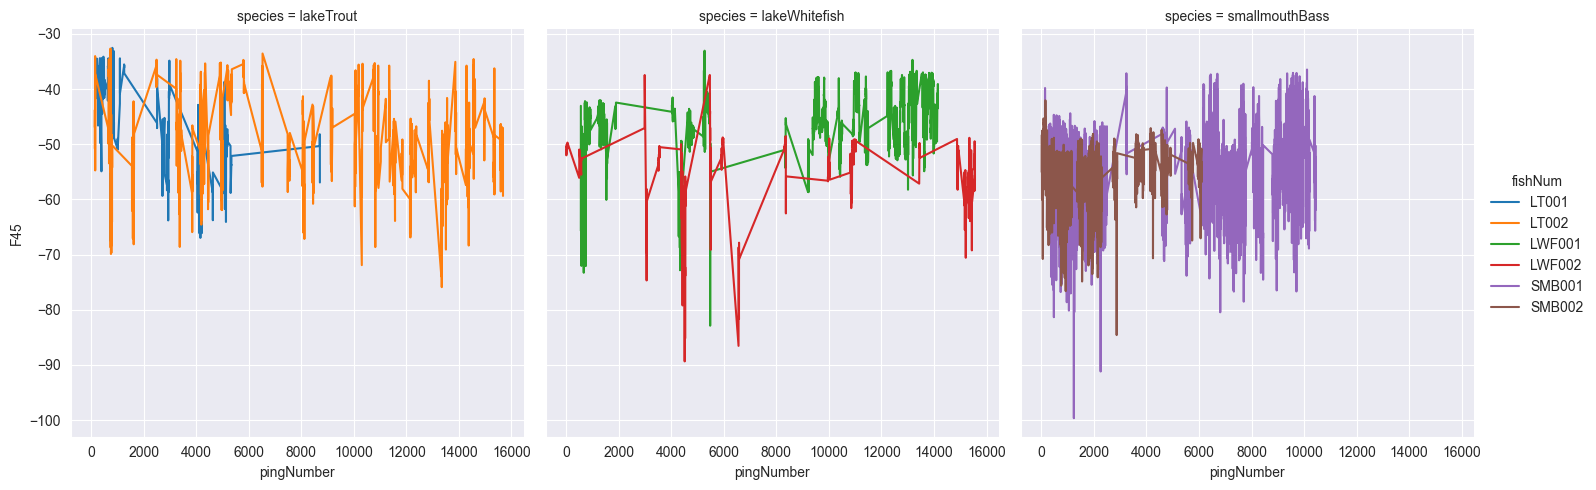

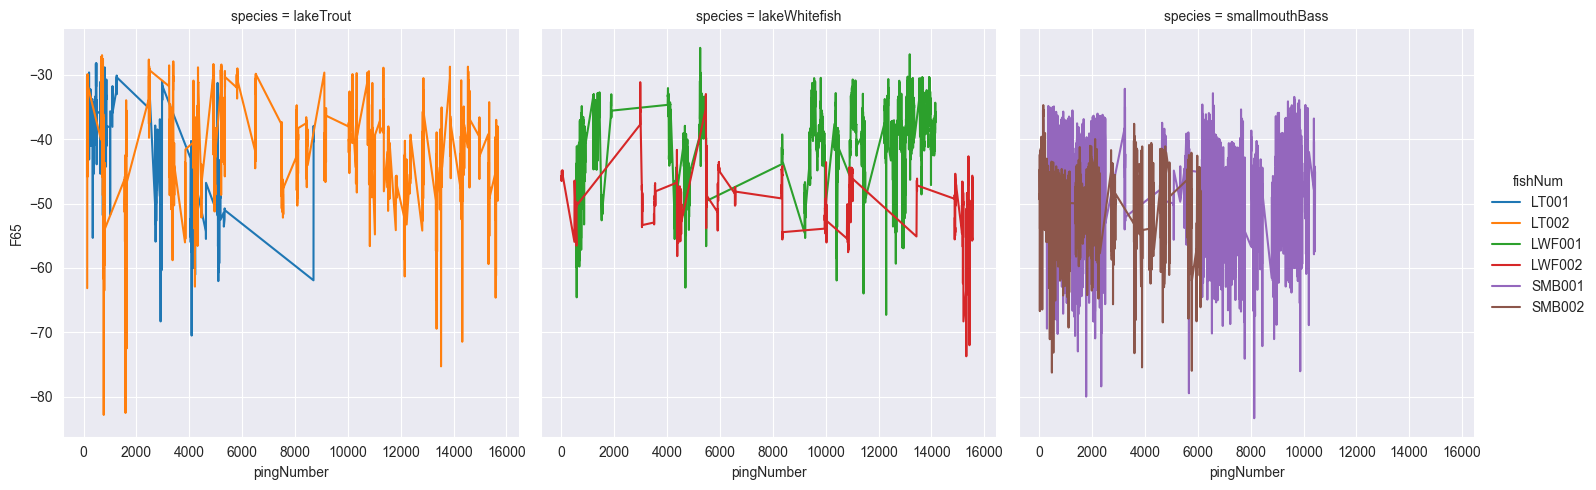

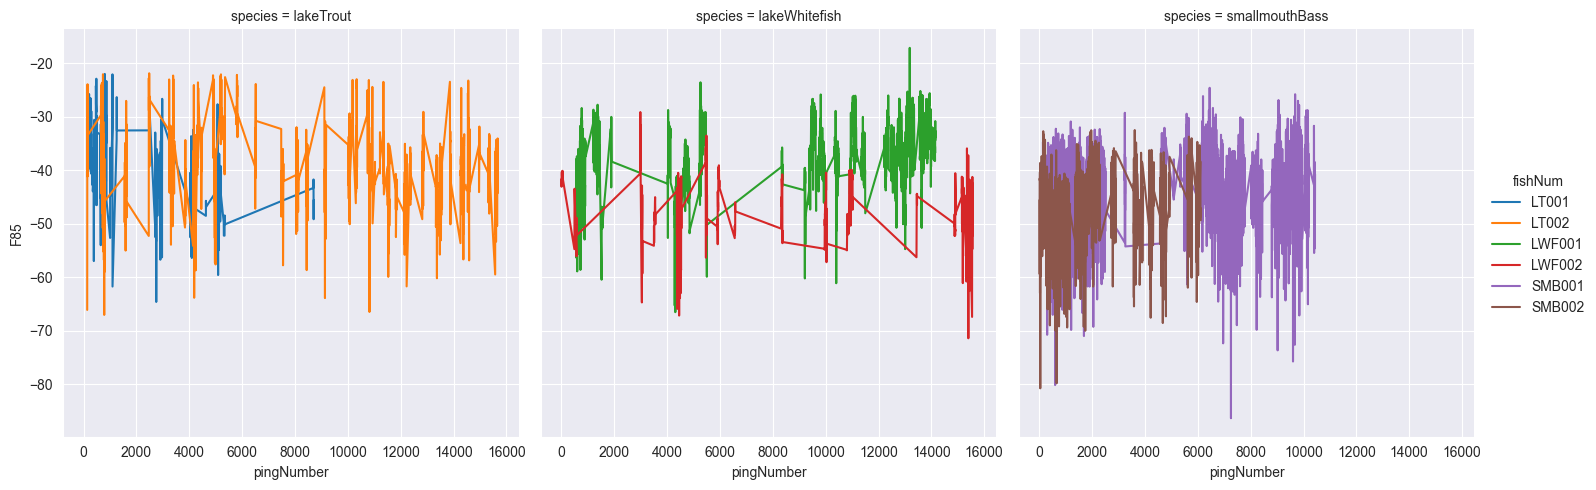

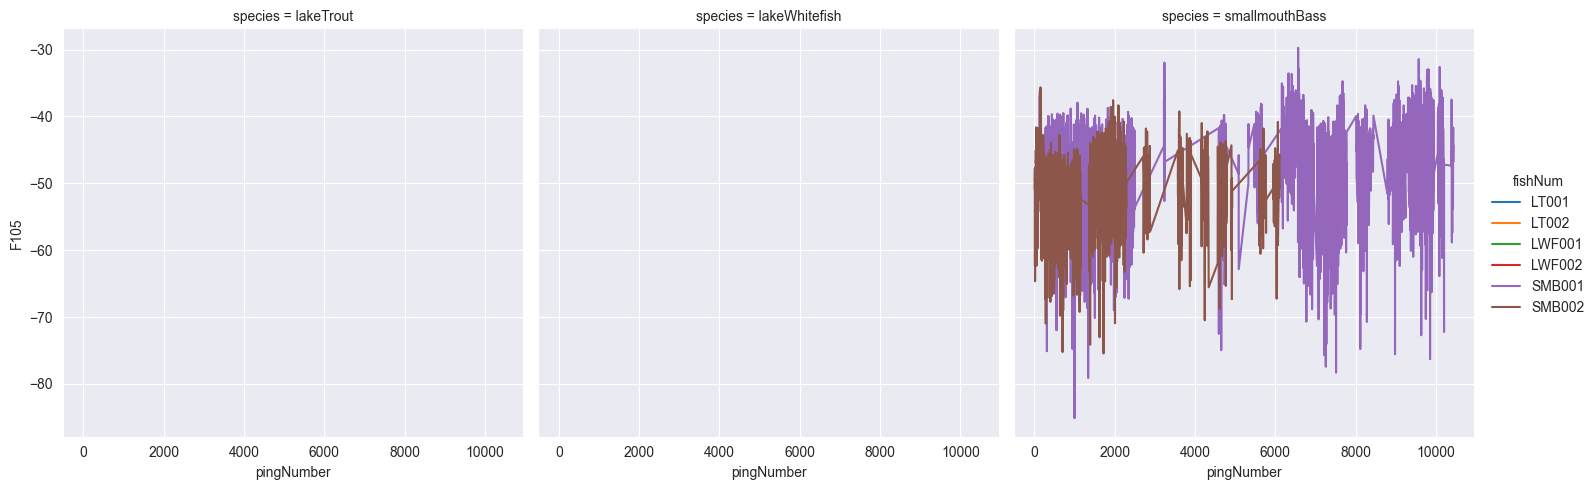

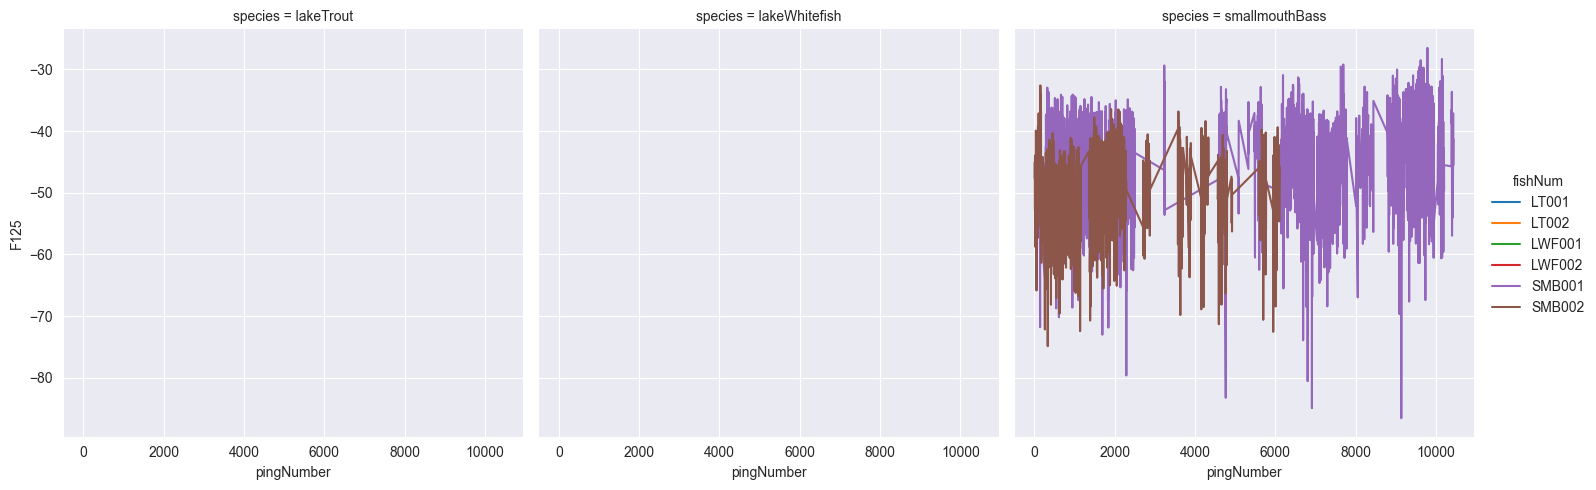

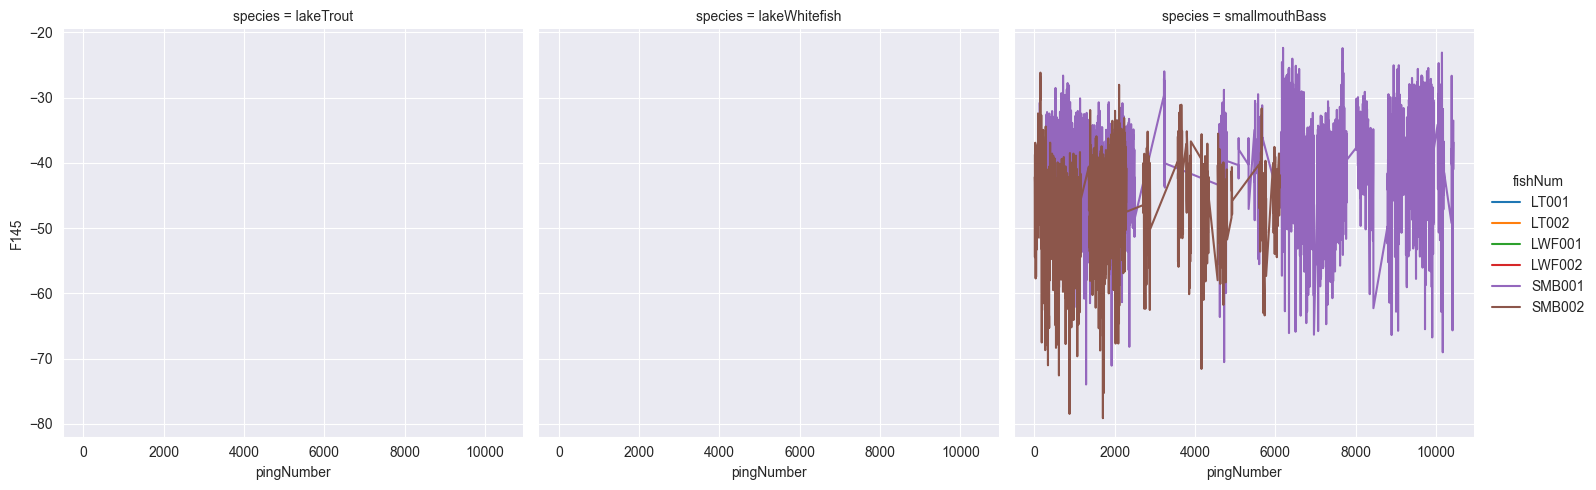

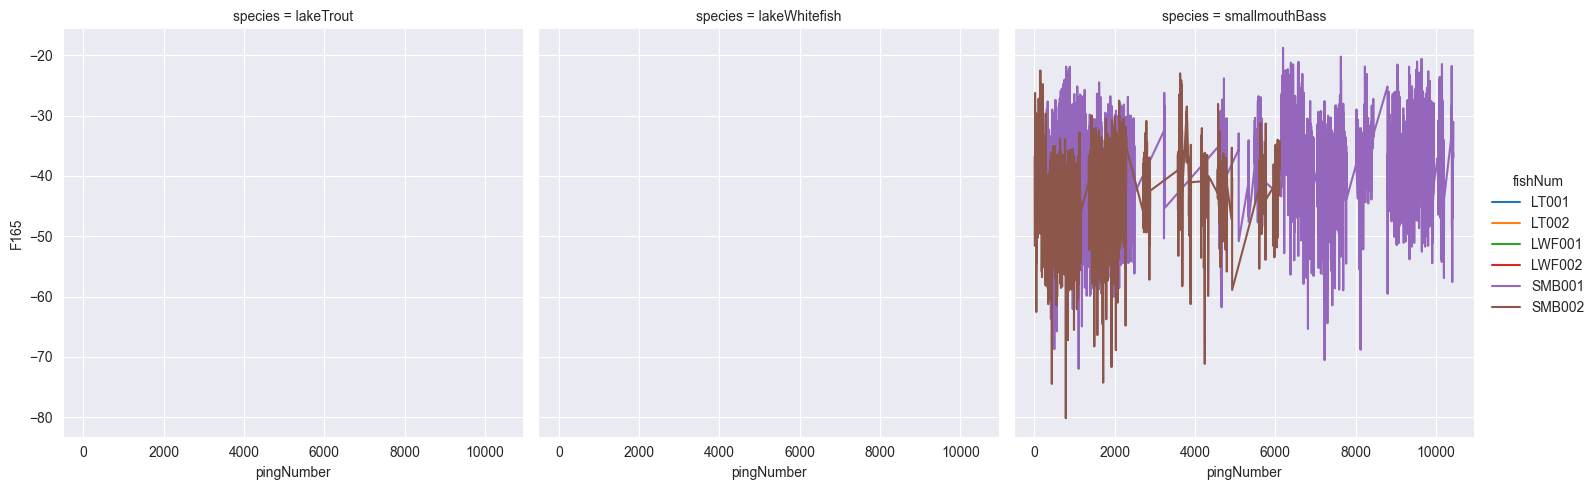

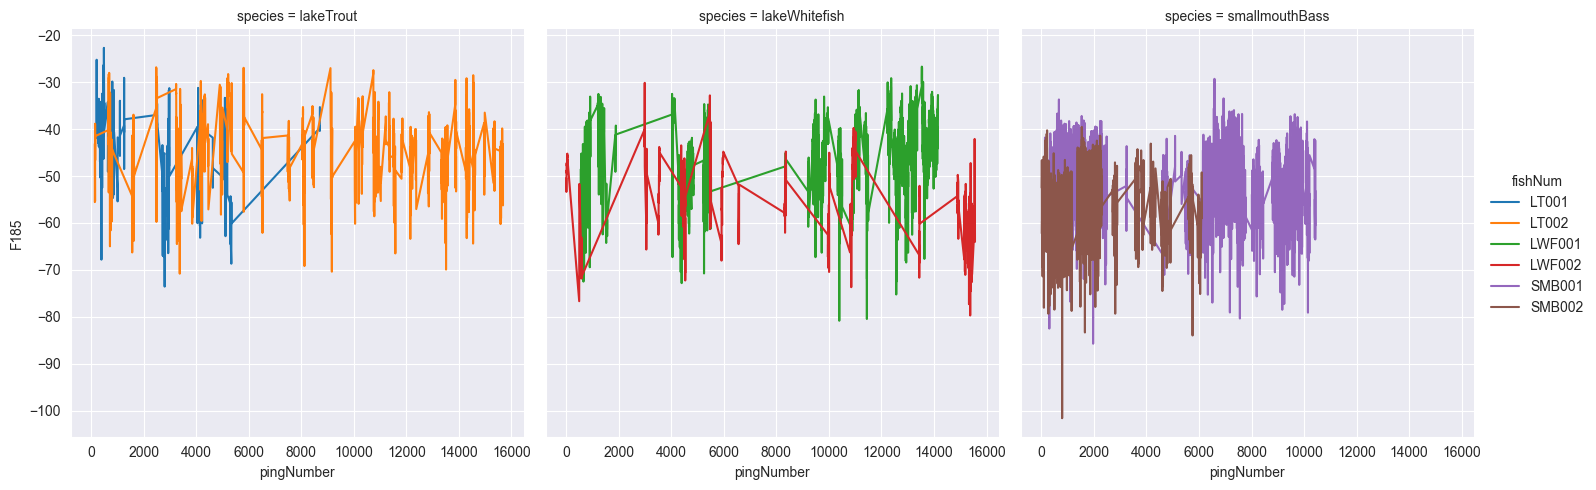

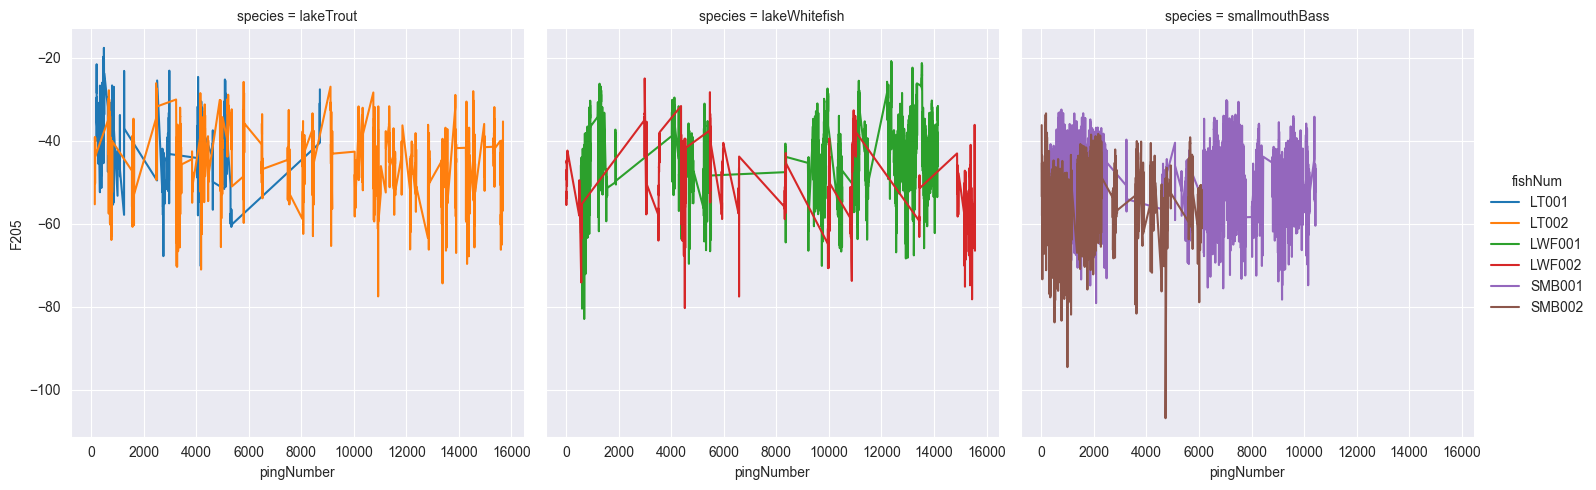

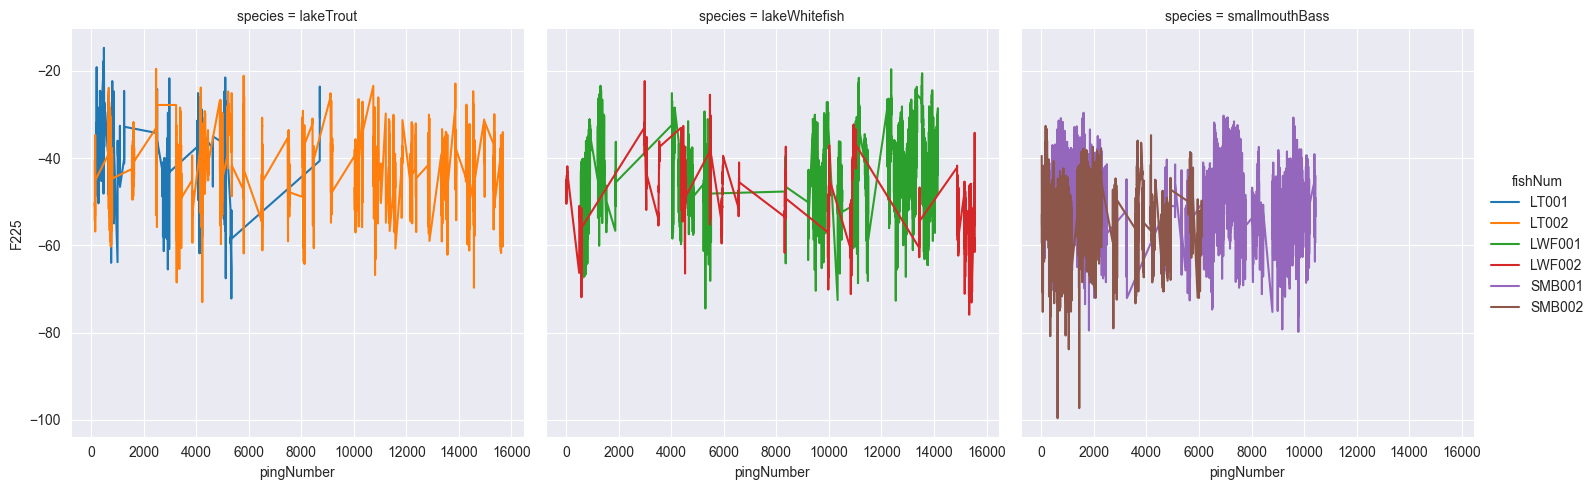

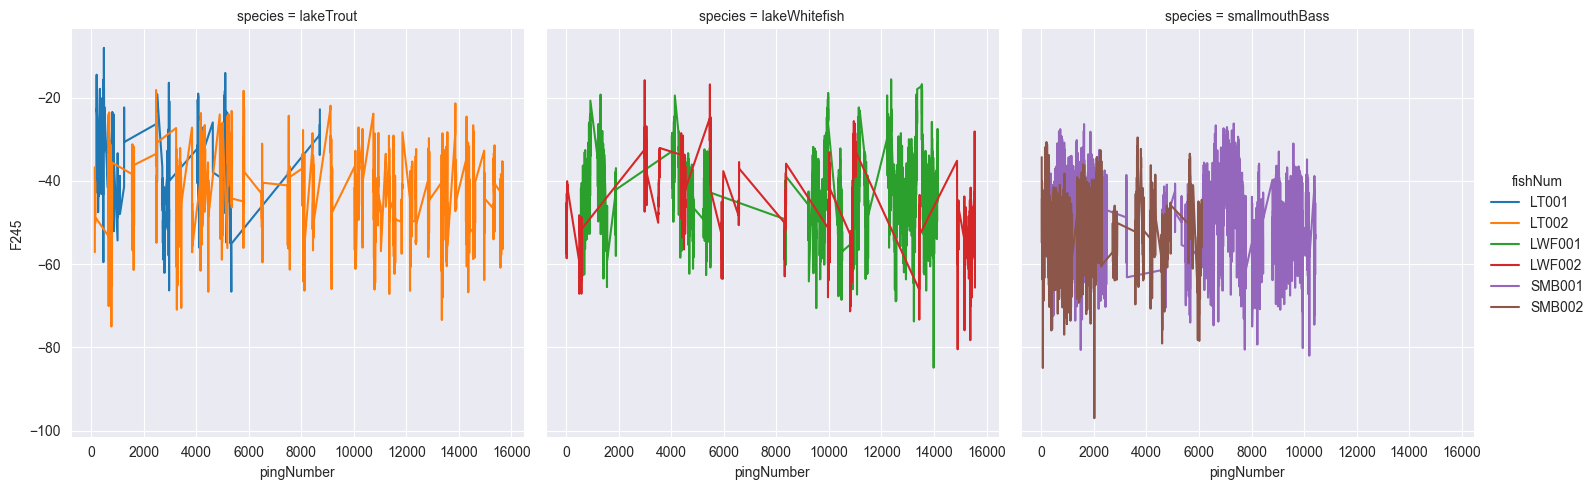

In [70]:
for freq in range(45, 260, 20):
    freqCol = "F"+str(freq)
    sns.relplot(data = edaSampProc,
            x = "pingNumber",
            y = freqCol,
            kind = "line",
            hue = "fishNum",
            col = "species"
            )

In [74]:
# for freq in range(45, 260, 20):
#     freqCol = "F"+str(freq)
#     sns.relplot(data = edaSampAna,
#             x = "pingNumber",
#             y = freqCol,
#             kind = "line",
#             hue = "fishNum",
#             col = "species"
#             )

# edaSampAna.columns.tolist()

# Scatter plot of average TS versus frequencies, facet by species

In [80]:
freqList = ["species"] + [col for col in proc_data.columns if re.match(r'^F\d+', col)]
edaAvgTSProc =  edaSampProc[freqList].groupby(["species"]).agg("mean")
edaAvgTSAna =  edaSampAna[freqList].groupby(["species"]).agg("mean")

In [88]:
edaAvgTSProc['species'] = edaAvgTSProc.index

In [92]:
edaAvgTSProc_long = pd.melt(edaAvgTSProc, id_vars = "species", value_vars = freqList[1:], value_name = 'TS')
edaAvgTSProc_long.head()

,species,variable,TS
0,lakeTrout,F45,-47.337154
1,lakeWhitefish,F45,-47.028569
2,smallmouthBass,F45,-55.255876
3,lakeTrout,F45.5,-47.008702
4,lakeWhitefish,F45.5,-46.795424


In [93]:
edaAvgTSProc_long.rename(columns = {"variable": "Freq"}, inplace = True)

In [95]:
edaAvgTSProc_long['Freq'] = edaAvgTSProc_long['Freq'].str.extract(r'(\d+)')

In [96]:
edaAvgTSProc_long

,species,Freq,TS
0,lakeTrout,45,-47.337154
1,lakeWhitefish,45,-47.028569
2,smallmouthBass,45,-55.255876
3,lakeTrout,45,-47.008702
4,lakeWhitefish,45,-46.795424
...,...,...,...
1273,lakeWhitefish,259,-30.996764
1274,smallmouthBass,259,-39.557602
1275,lakeTrout,260,-34.279334
1276,lakeWhitefish,260,-30.762385


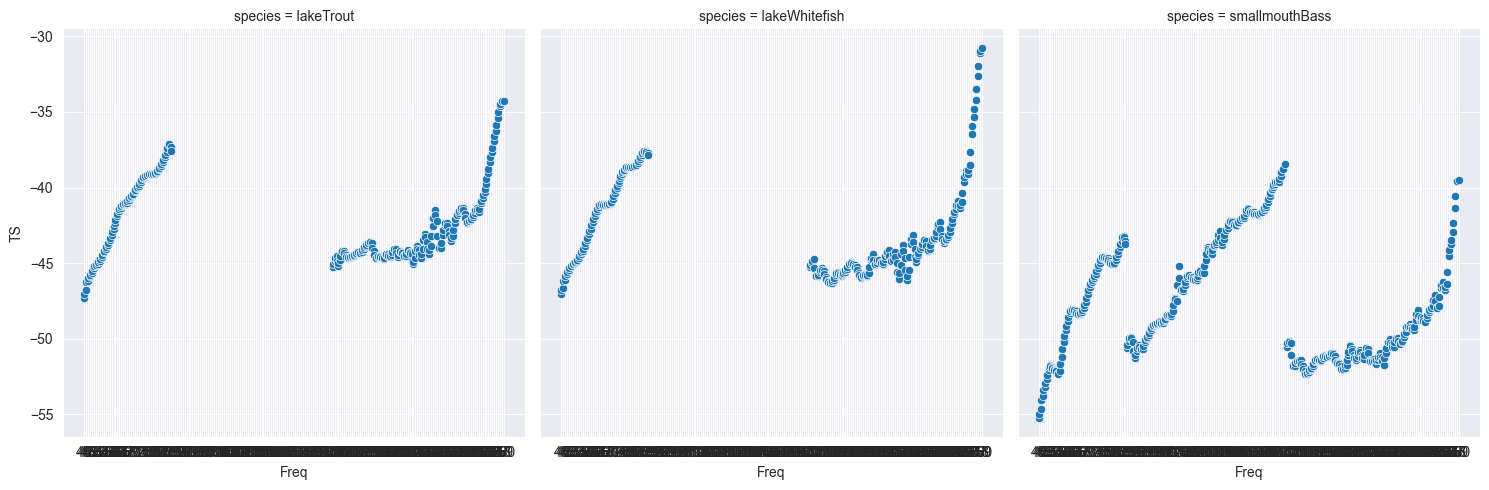

In [97]:
sns.relplot(
    data = edaAvgTSProc_long,
    kind = "scatter",
    x = "Freq",
    y = "TS",
    col = "species",
)

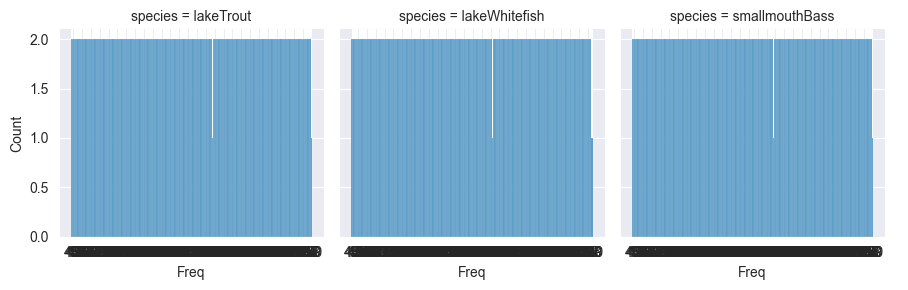

In [102]:
h = sns.FacetGrid(edaAvgTSProc_long, col = "species")
h.map(sns.histplot, "Freq")
h.add_legend()

# Clustered Histogram for important Frequencies

In [6]:
# Identify frequencies of discontinuities
edaSampProc.isnull().sum()
# Starting from 90kHz to 170kHz have missing values in LT and LWF

fishNum           0
dateSample        0
dateTimeSample    0
dateProcessed     0
species           0
                 ..
F258              0
F258.5            0
F259              0
F259.5            0
F260              0
Length: 483, dtype: int64

In [18]:
# Actual plotting
turningFreq = ["F88", "F88.5", "F89", "F173", "F173.5", "F174"]
tsForHist =  edaSampProc[["species"]+turningFreq]

In [19]:
tsForHist = pd.melt(tsForHist, id_vars = "species", value_vars = turningFreq, value_name = 'TS')

In [21]:
tsForHist.rename({"variable": "Freq"}, inplace = True)

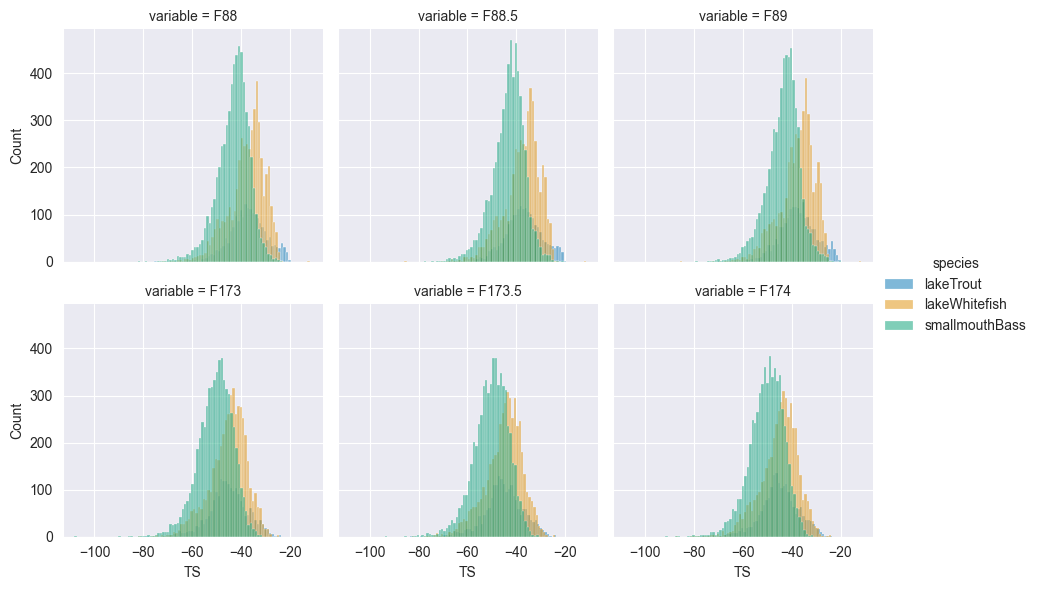

In [46]:
h = sns.FacetGrid(tsForHist, col = "variable", hue = "species", col_wrap = 3, palette = "colorblind")
# h.map(sns.histplot,"TS", bins=2, alpha=0.5, stat="density", kde = True)
h.map(sns.histplot,"TS", binwidth=1, alpha=0.5)
h.add_legend()
#h.set_titles("TS by Species and Frequencies")
h.set_axis_labels("TS", "Count")

## Observation: distributions seemed to be very different for F88, F88.5, FF173

# PCA for important frequencies

In [31]:
allFreq = [col for col in proc_data.columns if re.match(r'^F\d+', col)]
filteredFreq = [s for s in allFreq if 90 > float(s[1:]) or float(s[1:]) > 170]
filteredFreq

['F45',
 'F45.5',
 'F46',
 'F46.5',
 'F47',
 'F47.5',
 'F48',
 'F48.5',
 'F49',
 'F49.5',
 'F50',
 'F50.5',
 'F51',
 'F51.5',
 'F52',
 'F52.5',
 'F53',
 'F53.5',
 'F54',
 'F54.5',
 'F55',
 'F55.5',
 'F56',
 'F56.5',
 'F57',
 'F57.5',
 'F58',
 'F58.5',
 'F59',
 'F59.5',
 'F60',
 'F60.5',
 'F61',
 'F61.5',
 'F62',
 'F62.5',
 'F63',
 'F63.5',
 'F64',
 'F64.5',
 'F65',
 'F65.5',
 'F66',
 'F66.5',
 'F67',
 'F67.5',
 'F68',
 'F68.5',
 'F69',
 'F69.5',
 'F70',
 'F70.5',
 'F71',
 'F71.5',
 'F72',
 'F72.5',
 'F73',
 'F73.5',
 'F74',
 'F74.5',
 'F75',
 'F75.5',
 'F76',
 'F76.5',
 'F77',
 'F77.5',
 'F78',
 'F78.5',
 'F79',
 'F79.5',
 'F80',
 'F80.5',
 'F81',
 'F81.5',
 'F82',
 'F82.5',
 'F83',
 'F83.5',
 'F84',
 'F84.5',
 'F85',
 'F85.5',
 'F86',
 'F86.5',
 'F87',
 'F87.5',
 'F88',
 'F88.5',
 'F89',
 'F89.5',
 'F173',
 'F173.5',
 'F174',
 'F174.5',
 'F175',
 'F175.5',
 'F176',
 'F176.5',
 'F177',
 'F177.5',
 'F178',
 'F178.5',
 'F179',
 'F179.5',
 'F180',
 'F180.5',
 'F181',
 'F181.5',
 'F182',
 

In [32]:
avgFishTSProc =  edaSampProc[["fishNum"]+filteredFreq].groupby(["fishNum"]).agg("mean")
avgFishTSAna =  edaSampAna[["fishNum"]+filteredFreq].groupby(["fishNum"]).agg("mean")

In [44]:
X = avgFishTSProc
pca = PCA(n_components = 6, svd_solver = "full")
pca.fit(X)
print(pca.explained_variance_ratio_.round(2))
print(pca.singular_values_.round(2))


[0.94 0.05 0.01 0.   0.   0.  ]
[169.29  37.99  13.36  11.94   4.53   0.  ]


In [70]:
V2 = pca.components_[:2,]
Z2 = X @ V2.T
XHat = Z2 @ V2
XHat.shape
Z2

,0,1
fishNum,,
LT001,-661.069316,-34.855220
LT002,-695.009261,2.414117
LWF001,-671.108270,2.808363
LWF002,-798.519334,-32.111151
SMB001,-775.803690,-7.931422
SMB002,-844.692060,-3.453491


In [82]:
# pd.DataFrame(Z2, columns = ["PC1", "PC2"])
Z2.rename(columns = {0: "PC1", 1:"PC2"}, inplace = True)
Z2["Species"] = ["LT", "LT", "LWF", "LWF", "SMB", "SMB"]

<Axes: xlabel='PC1', ylabel='PC2'>

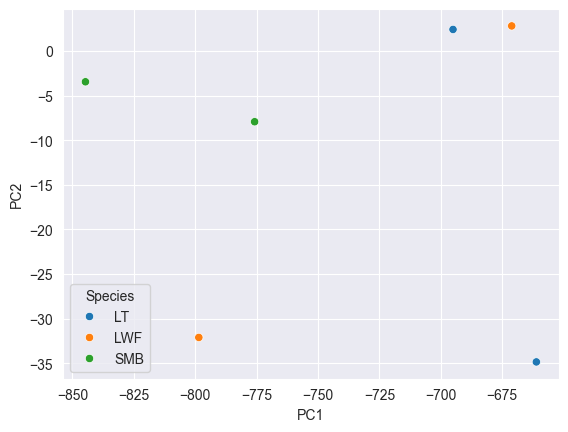

In [86]:
sns.scatterplot(data = Z2, x="PC1", y="PC2", hue = "Species").label(
        x="Body mass (g)", y="",
        color=str.capitalize,
        title="{} penguins".format,
)

# Logistic Lasso for Frequency Screencing

In [4]:
## What is the average target strength for each fish at each frequency?
## How does the average frequency differ by species?
## How does variability of average strength vary by frequency in each species?

# First, take a small sample from each species
import re
edaSampNum = ["LT001", "LT002", "LWF001", "LWF002", "SMB001", "SMB002"]
colList = ["fishNum", "species"] + [col for col in proc_data.columns if re.match(r'^F\d+', col)]

proc_data.loc[proc_data.fishNum.isin(edaSampNum), colList].to_csv("C:/Users/86139/Desktop/FishTetherExperiment/ProcessedData/EDA_data.csv", index=False)
# avgByFreqAndFishNum = proc_data.loc[proc_data.fishNum.isin(edaSampNum), colList].groupby(["fishNum"]).agg("mean")
# stdByFreqAndFishNum = proc_data.loc[proc_data.fishNum.isin(edaSampNum), colList].groupby(["fishNum"]).agg("std")

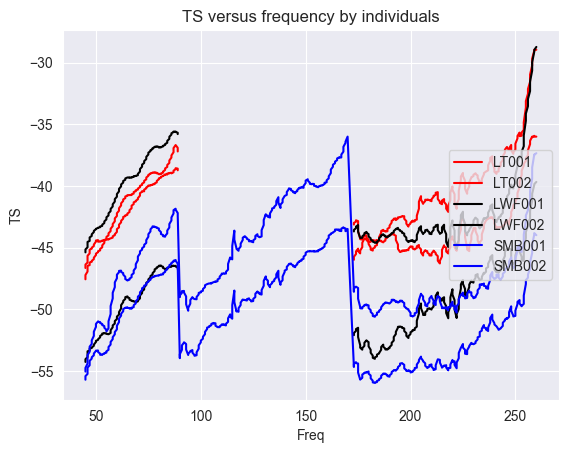

In [148]:
# Per each species, plot their line chart of relationships between TS and frequency, assign error bars.
# avgByFreqAndFishNum = avgByFreqAndFishNum.T

# Plotting each column separately
# plt.figure(num=226)
colorDict = {'LT001': "red", 'LT002': "red",
             'SMB001':'blue', 'SMB002':'blue',
             'LWF001':'black', 'LWF002':'black'}
freqNum = pd.Series(avgByFreqAndFishNum.columns)
freqNum = freqNum.str.extract(r'(\d+)', expand=False)
freqNum = freqNum.astype(int)

for row in avgByFreqAndFishNum.index:
    plt.plot(freqNum, avgByFreqAndFishNum.loc[row,:], label=row, color = colorDict[row])

# Add titles and labels
plt.title('TS versus frequency by individuals')
plt.xlabel('Freq')
plt.ylabel('TS')
plt.legend(loc='right')

# Show the plot
plt.show()

In [147]:
# freqNum = avgByFreqAndFishNum.columns.to_list()
# freqNum =[re.findall(r'\\d+', s) for s in freqNum]
# freqNum.str.extract(r'(\d+)', expand=False)
freqNum = pd.Series(avgByFreqAndFishNum.columns)
freqNum = freqNum.str.extract(r'(\d+)', expand=False)
freqNum = freqNum.astype(int)
freqNum.dtype

dtype('int64')

In [136]:
avgByFreqAndFishNum.columns

Index(['F45', 'F45.5', 'F46', 'F46.5', 'F47', 'F47.5', 'F48', 'F48.5', 'F49',
       'F49.5',
       ...
       'F255.5', 'F256', 'F256.5', 'F257', 'F257.5', 'F258', 'F258.5', 'F259',
       'F259.5', 'F260'],
      dtype='object', length=426)

In [149]:
proc_data.describe().T

,count,mean,std,min,25%,50%,75%,max
spCode,67288.0,140.746166,99.315173,81.000000,81.000000,81.000000,91.000000,316.000000
totalLength,67288.0,450.435085,106.624430,190.000000,390.000000,479.000000,532.000000,648.000000
forkLength,67000.0,411.967821,97.670575,178.000000,354.000000,448.000000,486.000000,580.000000
weight,67288.0,1090.472833,600.548408,76.000000,504.000000,1258.000000,1464.000000,2644.000000
girth,67288.0,243.216339,62.498496,71.000000,196.000000,259.000000,291.000000,335.000000
...,...,...,...,...,...,...,...,...
F258,66691.0,-38.204492,9.602584,-90.743846,-44.458245,-37.895859,-31.706106,-1.529955
F258.5,66691.0,-37.728543,9.732951,-89.894057,-44.052205,-37.563192,-31.210086,1.772686
F259,66691.0,-37.110075,9.900270,-94.558845,-43.599992,-37.104488,-30.563538,4.894078
F259.5,66691.0,-37.145419,10.041427,-86.357254,-43.766725,-37.234124,-30.543667,6.706720


In [ ]:
plt.figure()
sns.histplot(proc_data["F45.5"])
plt.show()

In [23]:
list(proc_data.columns).index("F45")

57

In [ ]:
startColIndex = 57
EndColIndex = 90
Inc = 0
plotPerImage = 3

while startColIndex + Inc <= EndColIndex:
    if Inc % 3 == 0:
        fig, axs = plt.subplots(1,3, figsize = (6,3))
    # ax[0,Inc % 3] = plt.hist(proc_data.iloc[curIndex], bins=100, density=True)
    curIndex = startColIndex + Inc
    # plt.subplot(nrows = 1, ncols= 3, index = Inc % 3)
    axs[Inc % 3].hist(proc_data.iloc[:, curIndex], bins=100, density=True)
    plt.title(proc_data.columns[curIndex])
    Inc += 1

    if Inc % 3 == 0:
        plt.show()

,fishNum,dateSample,dateTimeSample,dateProcessed,species,spCode,totalLength,forkLength,weight,girth,...,F255.5,F256,F256.5,F257,F257.5,F258,F258.5,F259,F259.5,F260
0,BUR001,2022-07-24,2022-07-24T11:03:00Z,2022-07-26,burbot,271,465,NaN,712,204,...,-35.300338,-32.164655,-28.532551,-26.435389,-24.920566,-24.920197,-26.182344,-23.195921,-20.935514,-19.696880
1,BUR001,2022-07-24,2022-07-24T11:03:00Z,2022-07-26,burbot,271,465,NaN,712,204,...,-26.214342,-23.973700,-22.102660,-21.368435,-21.159299,-23.350612,-33.865220,-22.276959,-17.447966,-16.242912
2,BUR001,2022-07-24,2022-07-24T11:03:00Z,2022-07-26,burbot,271,465,NaN,712,204,...,-26.822800,-24.543620,-22.987749,-22.066686,-20.416864,-18.283792,-15.914689,-12.739604,-12.235742,-12.369379
3,BUR001,2022-07-24,2022-07-24T11:03:00Z,2022-07-26,burbot,271,465,NaN,712,204,...,-30.783048,-29.365064,-28.257164,-26.975177,-24.021663,-20.363500,-17.227954,-14.199619,-14.372365,-14.995698
4,BUR001,2022-07-24,2022-07-24T11:03:00Z,2022-07-26,burbot,271,465,NaN,712,204,...,-25.980872,-25.457917,-24.962387,-24.180562,-21.715426,-18.732545,-16.442745,-14.235711,-15.039336,-15.783071


In [16]:
# How do different frequency of sounds differ in time series appearance?
pattern = "^F\\d+"
BUR001 = proc_data[proc_data["fishNum"] == "BUR001"].filter(regex = pattern)

In [17]:
BUR001.head()

,F45,F45.5,F46,F46.5,F47,F47.5,F48,F48.5,F49,F49.5,...,F255.5,F256,F256.5,F257,F257.5,F258,F258.5,F259,F259.5,F260
0,-38.814772,-38.830886,-38.890894,-38.620250,-38.722318,-38.564741,-38.539975,-38.510200,-38.407615,-38.443101,...,-35.300338,-32.164655,-28.532551,-26.435389,-24.920566,-24.920197,-26.182344,-23.195921,-20.935514,-19.696880
1,-44.603438,-42.725789,-41.198087,-39.672310,-38.792759,-37.935088,-37.488491,-37.307162,-37.280499,-37.519717,...,-26.214342,-23.973700,-22.102660,-21.368435,-21.159299,-23.350612,-33.865220,-22.276959,-17.447966,-16.242912
2,-52.359911,-54.653565,-53.172086,-50.974915,-49.548376,-48.066730,-47.039243,-46.487134,-46.300204,-46.466183,...,-26.822800,-24.543620,-22.987749,-22.066686,-20.416864,-18.283792,-15.914689,-12.739604,-12.235742,-12.369379
3,-41.738457,-41.201149,-40.828811,-40.455050,-40.965566,-41.857992,-43.550850,-45.941199,-49.106147,-53.412710,...,-30.783048,-29.365064,-28.257164,-26.975177,-24.021663,-20.363500,-17.227954,-14.199619,-14.372365,-14.995698
4,-40.327526,-40.770263,-41.374854,-41.825099,-42.891517,-43.998378,-45.545856,-47.296758,-48.872338,-49.850233,...,-25.980872,-25.457917,-24.962387,-24.180562,-21.715426,-18.732545,-16.442745,-14.235711,-15.039336,-15.783071


<Axes: >

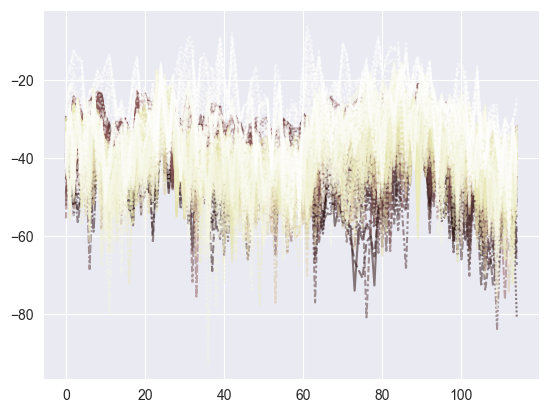

In [20]:
sns.lineplot(data = BUR001, legend = False, alpha = 0.5, palette = "pink")

In [29]:
# Are there multiple tests run on the same targets on different dates?
proc_data.loc[proc_data.fishNum == "BUR001", "dateSample"].value_counts()
# Yes, they are on the same date

dateSample
2022-07-24    115
Name: count, dtype: int64

In [44]:
# Are time stamp of each TS are roughly consecutive?
pd.to_datetime(proc_data.loc[proc_data.fishNum == "LT001", "dateTimeSample"])

288   2022-07-21 16:56:00+00:00
289   2022-07-21 16:56:00+00:00
290   2022-07-21 16:56:00+00:00
291   2022-07-21 16:56:00+00:00
292   2022-07-21 16:56:00+00:00
                 ...           
768   2022-07-21 16:56:00+00:00
769   2022-07-21 16:56:00+00:00
770   2022-07-21 16:56:00+00:00
771   2022-07-21 16:56:00+00:00
772   2022-07-21 16:56:00+00:00
Name: dateTimeSample, Length: 485, dtype: datetime64[ns, UTC]

In [43]:
pd.Timestamp.strptime("2023-01-01", "%d/%m/%y")

NotImplementedError: Timestamp.strptime() is not implemented. Use to_datetime() to parse date strings.

<Axes: >

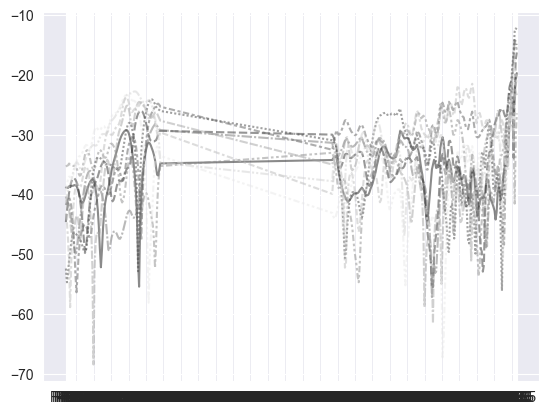

In [54]:
sns.lineplot(data = BUR001.T.iloc[:,0:10], legend = False, alpha = 0.5, palette = "grey")

In [95]:
## What is the echo time per each fish number
# timeByFishNum = proc_data.loc[:, ["fishNum", "dateTimeSample"]]
timeRangeFishNum = timeByFishNum.groupby("fishNum").dateTimeSample.agg(["max", "min"])

timeRangeFishNum

,max,min
fishNum,,
BUR001,2022-07-24T11:03:00Z,2022-07-24T11:03:00Z
BUR002,2022-07-24T11:24:00Z,2022-07-24T11:24:00Z
LT001,2022-07-21T16:56:00Z,2022-07-21T16:56:00Z
LT002,2022-07-22T11:08:00Z,2022-07-22T11:08:00Z
LT003,2022-07-22T12:06:00Z,2022-07-22T12:06:00Z
LT004,2022-07-22T17:31:00Z,2022-07-22T17:31:00Z
LT005,2022-07-23T10:28:00Z,2022-07-23T10:28:00Z
LT006,2022-07-23T18:19:00Z,2022-07-23T18:19:00Z
LT007,2022-07-23T19:11:00Z,2022-07-23T19:11:00Z


In [101]:
timeRangeFishNum["min"] = pd.to_datetime(timeRangeFishNum["min"])
timeRangeFishNum["max"] = pd.to_datetime(timeRangeFishNum["max"])
timeRangeFishNum["timeDifference"] = (timeRangeFishNum["max"]-timeRangeFishNum["max"]).dt.total_seconds()